In [1]:
import sklearn

import PrepareData as data
import pandas as pd
import numpy as np

In [2]:
data.fetch_housing_data()

In [3]:
housing = data.load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

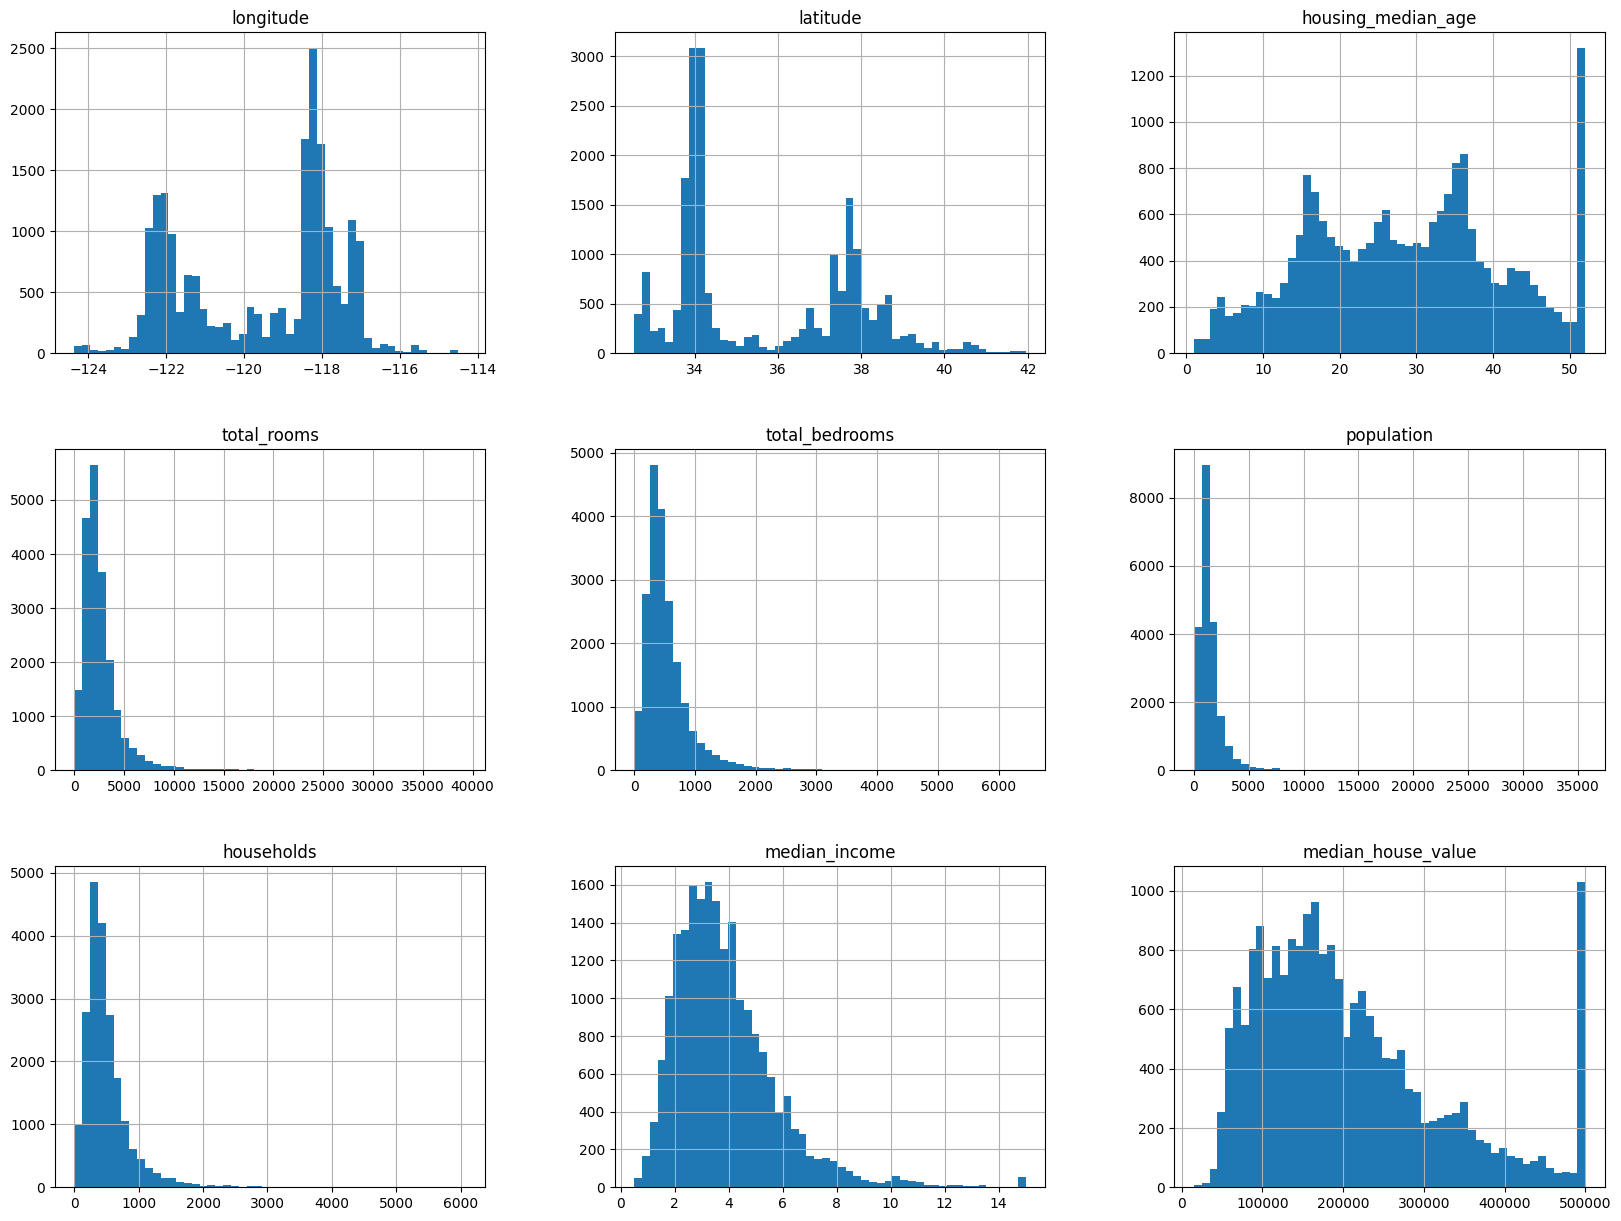

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
train_set.describe()
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


In [13]:
housing['income_cat'] = pd.cut(housing.median_income, bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

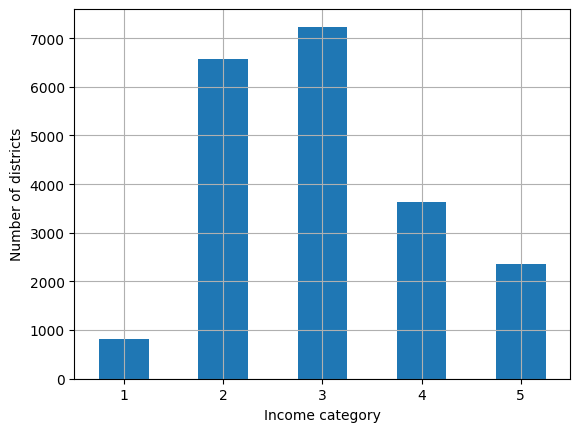

In [14]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income category')
plt.ylabel('Number of districts')
plt.show()

In [15]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing.income_cat, random_state=42)

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [17]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [18]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

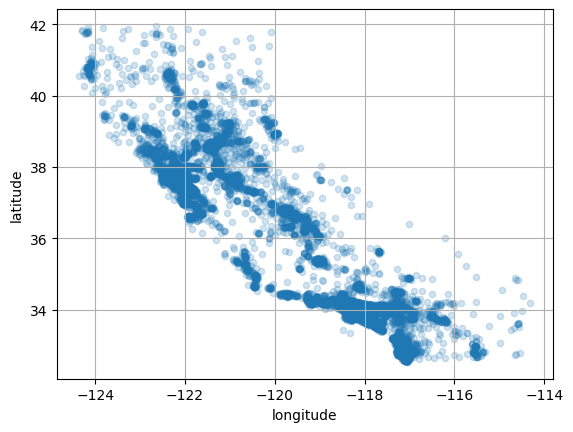

In [19]:
housing.plot(kind="scatter", y="latitude", x="longitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

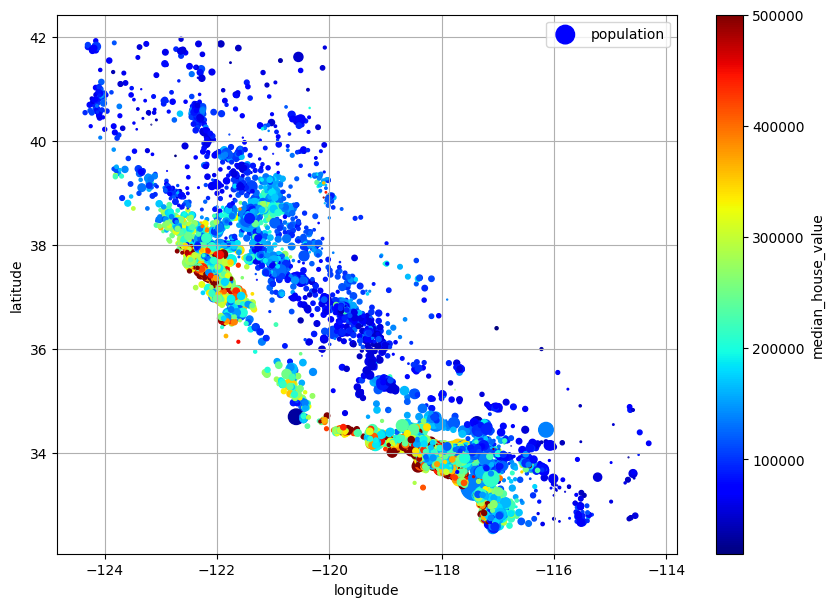

In [20]:
housing.plot(kind="scatter", x='longitude', y='latitude', grid=True, s=housing.population/100, c='median_house_value', cmap='jet', colorbar=True, legend=True, label='population', sharex=False, figsize=(10,7))

In [21]:
corelation_matrix = housing.corr(numeric_only=True)

In [22]:
corelation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

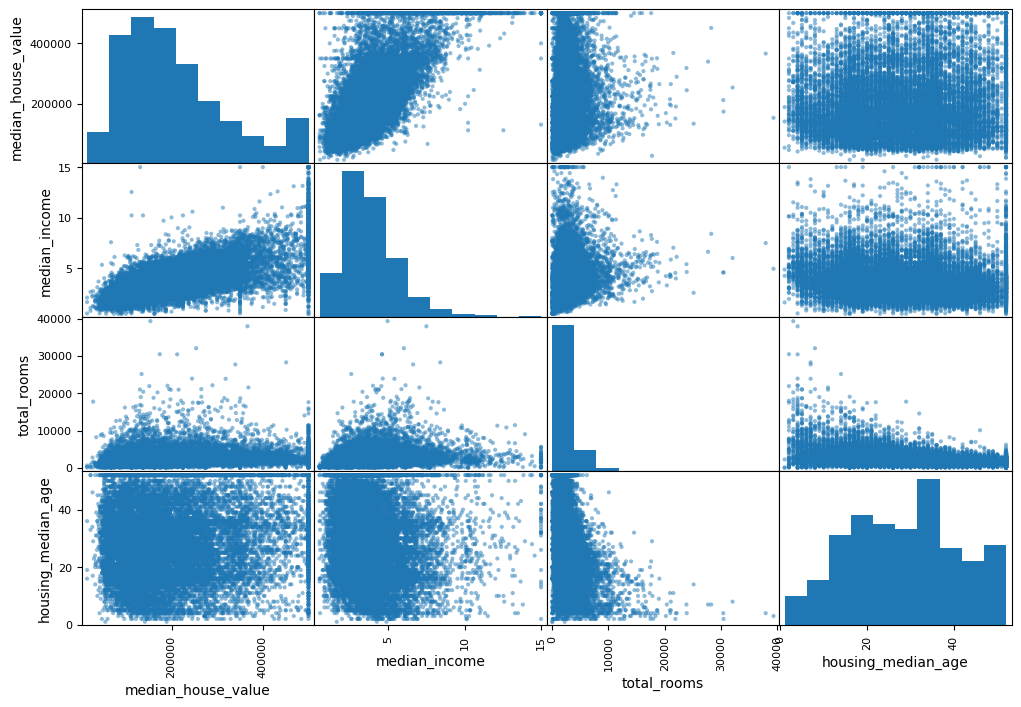

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [24]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_house'] = housing['total_bedrooms']/housing['households']
housing['people_per_house'] = housing['population']/housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']

In [25]:
corr_matrix = housing.corr(numeric_only=True)

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
bedrooms_per_house   -0.043349
longitude            -0.047466
latitude             -0.142673
bedroom_ratio        -0.259952
Name: median_house_value, dtype: float64

In [27]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [32]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [33]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [34]:
housing_cat = housing[['ocean_proximity']]

In [35]:
housing_cat.ocean_proximity.value_counts().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
housing_cat_encoded = ord_encoder.fit_transform(housing_cat)

In [37]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [38]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

In [39]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [40]:
df_test = pd.DataFrame({'ocean_proximity':['INLAND', 'NEAR BAY']})
pd.get_dummies(df_test, dtype='int64')

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [41]:
df_test = pd.DataFrame(pd.concat([df_test.ocean_proximity, pd.Series(['MIDDLE RANGE'])], ignore_index=True), columns=['ocean_proximity'])
pd.get_dummies(df_test, dtype='int64')

,ocean_proximity_INLAND,ocean_proximity_MIDDLE RANGE,ocean_proximity_NEAR BAY
0,1,0,0
1,0,0,1
2,0,1,0


In [42]:
onehot_encoder.handle_unknown='ignore'
df_test_1hot = onehot_encoder.transform(df_test)

In [43]:
df_test_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [44]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
onehot_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [46]:
onehot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [47]:
pd.DataFrame(df_test_1hot.toarray(), columns=onehot_encoder.get_feature_names_out(), index=df_test.index)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))

In [49]:
housing_num_minmax_scaled = minmax_scaler.fit_transform(housing_num)
pd.DataFrame(housing_num_minmax_scaled, columns=housing_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.424303,0.270988,0.098039,-0.803276,-0.743879,-0.874772,-0.737117,-0.769148
1,0.418327,-0.883103,-0.764706,-0.729664,-0.725193,-0.887217,-0.713966,-0.194852
2,0.057769,-0.398512,0.686275,-0.917994,-0.900773,-0.962779,-0.888723,-0.672405
3,0.438247,-0.955367,-0.098039,-0.904818,-0.833441,-0.949830,-0.820388,-0.761865
4,0.125498,-0.630181,0.019608,-0.820420,-0.792526,-0.897194,-0.784167,-0.448766
...,...,...,...,...,...,...,...,...
16507,0.450199,-0.895855,-0.490196,-0.661240,-0.604059,-0.886600,-0.626960,-0.366891
16508,-0.416335,0.268863,-0.450980,-0.598362,-0.542526,-0.732840,-0.471247,-0.680832
16509,-0.675299,0.253985,0.843137,-0.964338,-0.947165,-0.974495,-0.936520,-0.630378
16510,-0.671315,0.226355,-0.490196,-0.839803,-0.813789,-0.932453,-0.813667,-0.490145


In [50]:
from sklearn.preprocessing import StandardScaler
stndrd_scalar = StandardScaler()
housing_num_stndrd_scaled = stndrd_scalar.fit_transform(housing_num)
housing_num_stndrd_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [51]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

label_scaler = StandardScaler()
label_scaled = label_scaler.fit_transform(housing_label.to_frame())

linear_regression = LinearRegression()
linear_regression.fit(housing[['median_income']], label_scaled)
some_new_data = housing[['median_income']].iloc[:5]

scaled_prediction = linear_regression.predict(some_new_data)
prediction = label_scaler.inverse_transform(scaled_prediction)
prediction

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

In [53]:
from sklearn.compose import TransformedTargetRegressor

transform_scaler = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
transform_scaler.fit(housing[['median_income']], housing_label)
prediction = transform_scaler.predict(some_new_data)
prediction

array([135958.75805364, 309735.008975  , 165232.3998617 , 138162.41971241,
       232903.1766333 ])

<Axes: >

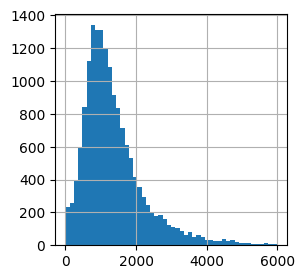

In [54]:
housing[housing['population']<6000]['population'].hist(bins=50, figsize=(3,3))

array([[<Axes: title={'center': 'population'}>]], dtype=object)

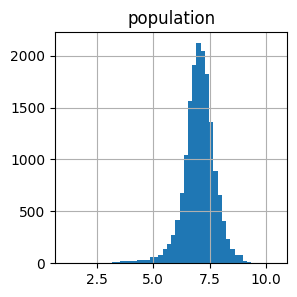

In [55]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])
log_pop.hist(figsize=(3, 3), bins=50)

In [56]:
rbs_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.0]], gamma=0.1))
age_simil_35 = rbs_transformer.transform(housing[['housing_median_age']])
age_simil_35_small = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.03)

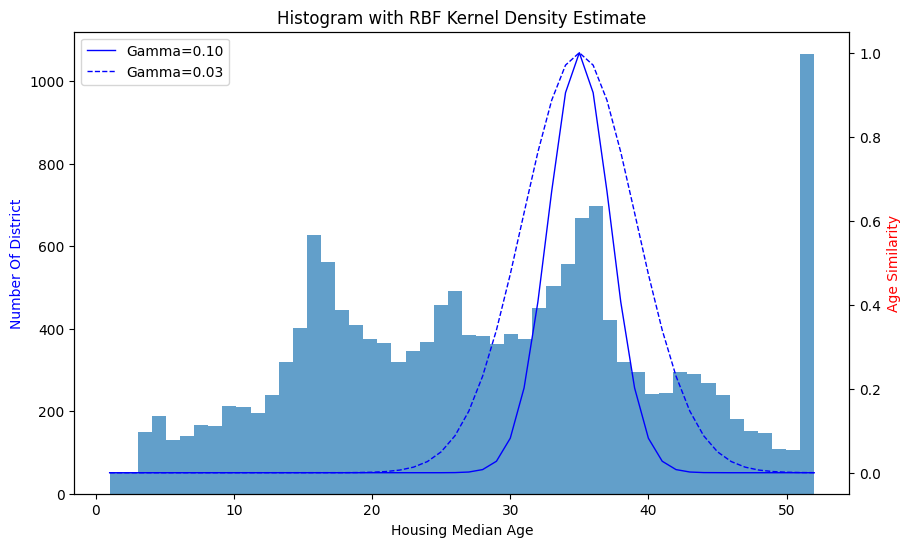

In [57]:
data = pd.DataFrame({'housing_median_age': housing['housing_median_age'], 'age_simil_35': age_simil_35.flatten(), 'age_simil_35_small': age_simil_35_small.flatten()})
data = data.sort_values(by='housing_median_age')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histogram
hist = ax1.hist(housing['housing_median_age'], bins=50, alpha=0.7)
ax1.set_xlabel('Housing Median Age')
ax1.set_ylabel('Number Of District', color='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Age Similarity', color='red')
ax2.plot(data['housing_median_age'], data['age_simil_35'], label='Gamma=0.10', color='blue', linewidth=1)
ax2.plot(data['housing_median_age'], data['age_simil_35_small'], label='Gamma=0.03', color='blue', linestyle='--', linewidth=1)

ax2.legend(loc='upper left')

# Show the plot
plt.title('Histogram with RBF Kernel Density Estimate')
plt.show()

In [58]:
sf_coord = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args={'Y':[sf_coord], 'gamma':0.1})
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])

In [59]:
sf_simil

array([[0.86435873],
       [0.0076117 ],
       [0.18013578],
       ...,
       [0.94757821],
       [0.9636345 ],
       [0.61315569]])

In [60]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]]/X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [61]:
from transformer import ClusterSimilarity

In [62]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_label)
similarities[:3].round(2)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.  , 0.31, 0.  , 0.85, 0.  , 0.  , 0.  , 0.  , 0.16, 0.49],
       [0.11, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.41, 0.  , 0.  ],
       [0.11, 0.  , 0.15, 0.  , 0.  , 0.37, 0.  , 0.02, 0.  , 0.  ]])

In [63]:
cluster_simil.cluster_centers

array([[  34.06511908, -118.35030126],
       [  37.88462257, -122.33803775],
       [  36.64376968, -119.57119006],
       [  38.86359493, -121.24107294],
       [  32.94831211, -117.0374419 ],
       [  34.76136282, -119.8290869 ],
       [  40.36746665, -123.12326932],
       [  33.85422005, -117.79044018],
       [  37.26043289, -121.95892083],
       [  37.79873967, -121.01497475]])

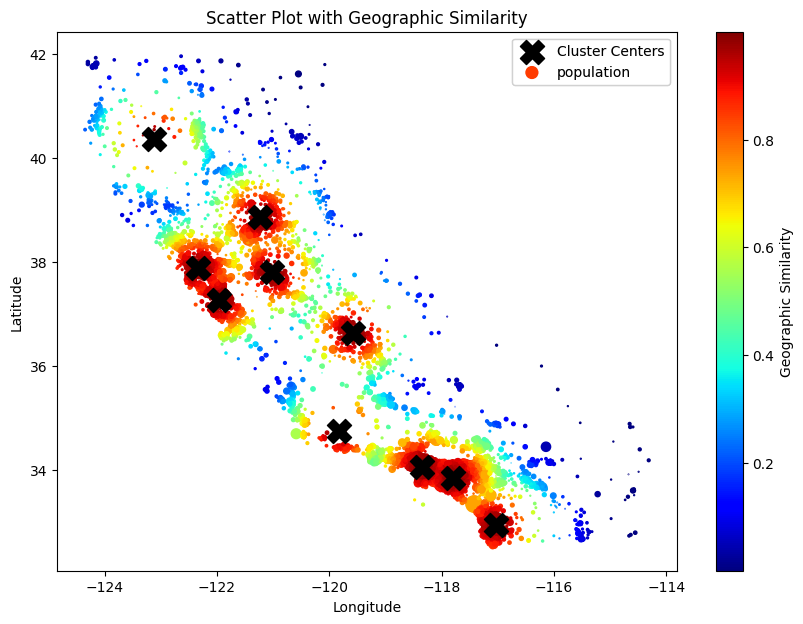

In [64]:
max_similarity_values = similarities.max(axis=1)

# Create a scatter plot for data points
plt.figure(figsize=(10, 7))
scatter_data_points = plt.scatter(x=housing['longitude'], y=housing['latitude'], c=max_similarity_values, cmap='jet', s=housing.population/250, label='population')

# Create a scatter plot for cluster centers with 'X' marker
scatter_cluster_centers = plt.scatter(x=cluster_simil.cluster_centers[:, 1], y=cluster_simil.cluster_centers[:, 0], marker='X', color='black', s=300, label='Cluster Centers')

# Add colorbar
leg = plt.legend(handles=[scatter_cluster_centers, scatter_data_points], loc='upper right')
plt.gca().add_artist(leg)

cbar = plt.colorbar(scatter_data_points)
cbar.set_label('Geographic Similarity')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Geographic Similarity')
plt.show()

In [65]:
from sklearn.pipeline import Pipeline
import sklearn
sklearn.set_config(display='diagram')
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [66]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [67]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [68]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [69]:
from sklearn.compose import ColumnTransformer

num_attrs = list(housing.columns[:-1].values)
cat_attrs = list(housing.columns[-1:])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', cat_pipeline, cat_attrs)
])

In [70]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [71]:
housing_prepared = preprocessing.fit_transform(housing)
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
df_housing_prepared

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [72]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [73]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)

In [74]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_label)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD081D7880>)])),
                ('linearregression', LinearRegression())])

In [76]:
housing_prediction = lin_reg.predict(housing)
housing_prediction[:5].round(-2)

array([ 70700., 288200., 186000., 189700., 270700.])

In [77]:
housing_label.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [78]:
from sklearn.metrics import mean_squared_error

lin_rsme = mean_squared_error(housing_label, housing_prediction, squared=False)
lin_rsme

69239.95619019221

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_label)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD081D7880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [81]:
housing_predictions = tree_reg.predict(housing)
tree_rsme = mean_squared_error(housing_label, housing_predictions, squared=False)
tree_rsme

0.0

In [82]:
from sklearn.model_selection import cross_val_score

tree_rsmes = -cross_val_score(tree_reg, housing, housing_label, scoring="neg_root_mean_squared_error", cv=10)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

In [83]:
pd.Series(tree_rsmes).describe()

count       10.000000
mean     67430.987159
std       3623.038287
min      62118.730843
25%      64487.233745
50%      67826.258425
75%      69227.770860
max      74127.491554
dtype: float64

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_label,
                                scoring="neg_root_mean_squared_error", cv=10)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

In [86]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47328.782275
std       2456.436091
min      43953.861521
25%      45272.501522
50%      47431.774424
75%      49045.891146
max      51153.378784
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_label)